In [2]:
import tensorflow_datasets as tsdf

# Load the subword encoded pretokenized dataset
dataset, info = tsdf.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

# Load tokenizer
tokenizer = info.features['text'].encoder

Dl Completed...: 100%|██████████| 1/1 [00:13<00:00, 13.47s/ url]


Dataset imdb_reviews downloaded and prepared to /home/iman/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

# Get the train and test splits
train_data, test_data = dataset['train'], dataset['test']

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

## Build the Model

In [7]:
import tensorflow as tf

# Hyperparameters
embedding_dim = 64
filters = 128
kernel_size = 5
dinse_dim =64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dinse_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
num_epochs = 10

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 182s 2s/step - loss: 0.6879 - accuracy: 0.5227 - val_loss: 0.5282 - val_accuracy: 0.7760
Epoch 2/10
98/98 [==============================] - 183s 2s/step - loss: 0.3984 - accuracy: 0.8500 - val_loss: 0.3195 - val_accuracy: 0.8725
Epoch 3/10
98/98 [==============================] - 171s 2s/step - loss: 0.2269 - accuracy: 0.9191 - val_loss: 0.3058 - val_accuracy: 0.8790
Epoch 4/10
98/98 [==============================] - 164s 2s/step - loss: 0.1817 - accuracy: 0.9376 - val_loss: 0.3272 - val_accuracy: 0.8726
Epoch 5/10
98/98 [==============================] - 166s 2s/step - loss: 0.1525 - accuracy: 0.9470 - val_loss: 0.3465 - val_accuracy: 0.8728
Epoch 6/10
98/98 [==============================] - 185s 2s/step - loss: 0.1277 - accuracy: 0.9582 - val_loss: 0.3870 - val_accuracy: 0.8688
Epoch 7/10
98/98 [==============================] - 193s 2s/step - loss: 0.1058 - accuracy: 0.9664 - val_loss: 0.4322 - val_accuracy: 0.8638
Epoch 8/10
98

The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


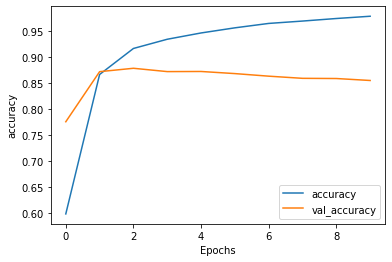

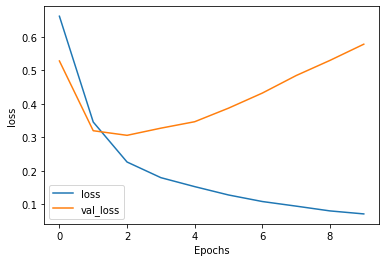

In [10]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

# Plot the accuracy ang results
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')